In [ ]:
import pandas as pd

df = pd.read_csv('wine-training.csv')
print(df.head()) # Print the first few rows to verify
df.info()


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    13.71        1.86  2.36               16.6        101           2.61   
1    13.88        5.04  2.23               20.0         80           0.98   
2    12.29        1.41  1.98               16.0         85           2.55   
3    12.21        1.19  1.75               16.8        151           1.85   
4    12.82        3.37  2.30               19.5         88           1.48   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        2.88                  0.27             1.69             3.80  1.11   
1        0.34                  0.40             0.68             4.90  0.58   
2        2.50                  0.29             1.77             2.90  1.23   
3        1.28                  0.14             2.50             2.85  1.28   
4        0.66                  0.40             0.97            10.26  0.72   

     od  proline  wine  
0  4.00     1035     0  
1  1.33     

In [ ]:
# prompt: count of wine column (count of the 0's 1's and 2's

df['wine'].value_counts()


,count
wine,
1,47
0,39
2,33


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = df.drop('wine', axis=1)
y = df['wine']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a RandomForestClassifier (you can experiment with other models)
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust n_estimators as needed
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9166666666666666


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Load the holdout dataset
holdout_df = pd.read_csv('wine-holdout.csv')

if 'wine' in holdout_df.columns:
    X_holdout = holdout_df.drop('wine', axis=1)
else:
    X_holdout = holdout_df


# Make predictions on the holdout set using the trained model
holdout_predictions = model.predict(X_holdout)

# You can now use 'holdout_predictions' which contains the predicted wine classes
holdout_predictions

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1])

In [ ]:
# prompt: make the predictions into a csv file

import pandas as pd


# Create a DataFrame for the predictions
predictions_df = pd.DataFrame({'predicted_wine': holdout_predictions})

# Save the predictions to a CSV file
predictions_df.to_csv('NATHANIELLEONARDSON-ice1-predictions.csv', index=False)


In [ ]:
# prompt: make a decision matrix based on the model

import pandas as pd
import numpy as np

# Assuming 'y_pred' and 'y_test' are available from your previous code
# Create a DataFrame for the decision matrix
decision_matrix = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Add a column to indicate correct/incorrect predictions
decision_matrix['Correct'] = np.where(decision_matrix['Actual'] == decision_matrix['Predicted'], 'Correct', 'Incorrect')

# Calculate and print the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification report
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[7 1 0]
 [0 8 1]
 [0 0 7]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.89      0.89      0.89         9
           2       0.88      1.00      0.93         7

    accuracy                           0.92        24
   macro avg       0.92      0.92      0.92        24
weighted avg       0.92      0.92      0.92        24



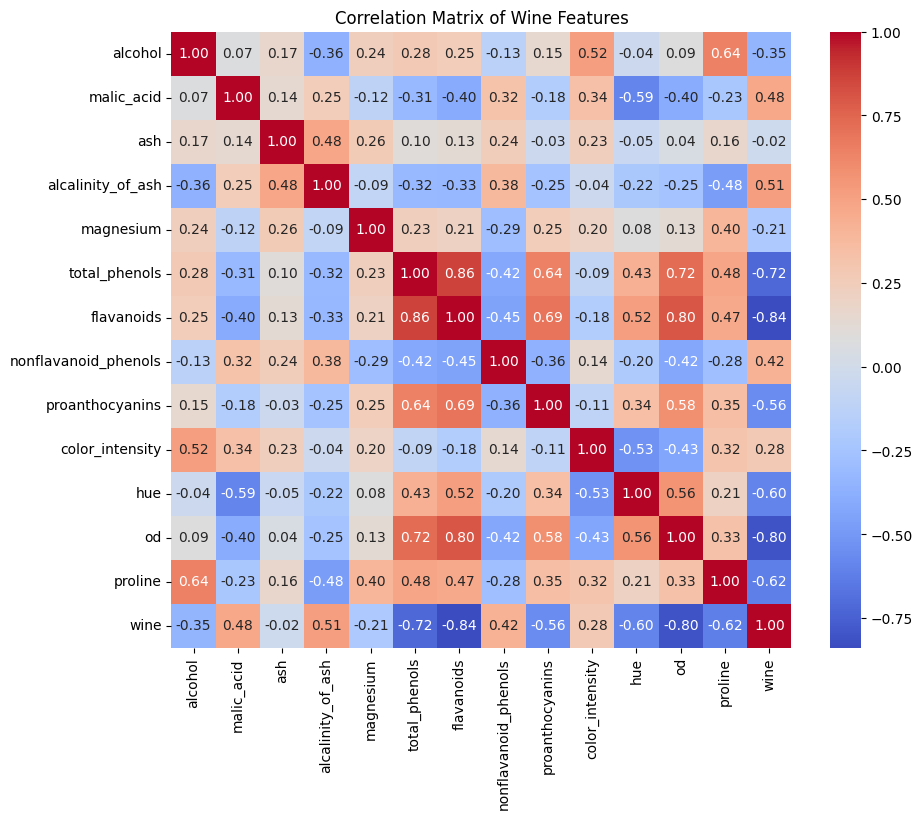

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

# Display the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Wine Features')
plt.show()


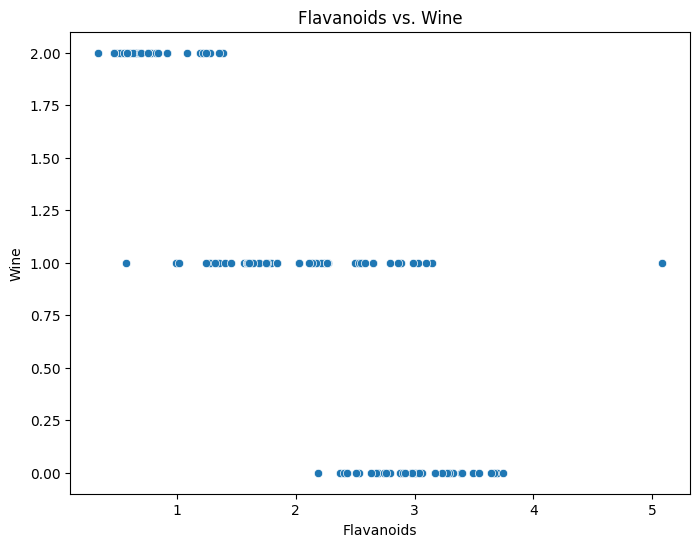

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.scatterplot(x='flavanoids', y='wine', data=df)
plt.title('Flavanoids vs. Wine')
plt.xlabel('Flavanoids')
plt.ylabel('Wine')
plt.show()


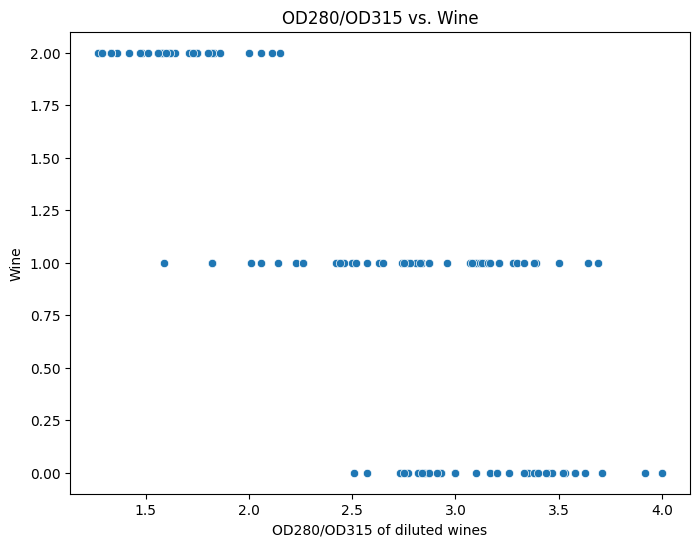

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.scatterplot(x='od', y='wine', data=df)
plt.title('OD280/OD315 vs. Wine')
plt.xlabel('OD280/OD315 of diluted wines')
plt.ylabel('Wine')
plt.show()
